# **Data Exploration with Python using Pandas & Numpy Libraries**

* **Student Name: Nidhi Gupta, Ankit Sharma**
* **Enrollment Number: 055006, 055059**
* **Group No:6**

---

In [26]:
# Import Relevant Python Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Import dataset
df= pd.read_csv("C:\\Users\\Ankit Sharma\\OneDrive\\Desktop\\python project data set.csv")

In [30]:
#Random Sample from the dataset
df_sample = df.sample(n=2001, random_state = 1160)


<span style="color: green; font-weight: bold;">**Description of Data**</span>


**Data Source** = [Imports_Exports_Dataset on Kaggle](https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000)

In [34]:
# Dimensions of the data 
dimensions = df_sample.shape
print('No. of rows in the data are:',dimensions[0])
print('No. of columns in the data are:',dimensions[1])

No. of rows in the data are: 2001
No. of columns in the data are: 16


In [ ]:
Number of Rows in data are 2001
number of column in data are 15

In [36]:
#number of observations
print('Number of Observations in the dataset are:',len(df_sample))

Number of Observations in the dataset are: 2001


In [38]:
#Number of Variables
var_list= df_sample.columns
print('Number of Variables are:',len(var_list))
print('List of Variables are:',list(var_list))

Number of Variables are: 16
List of Variables are: ['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity', 'Value', 'Date', 'Category', 'Port', 'Customs_Code', 'Weight', 'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number', 'Payment_Terms']


**Variable Types:**
1) **Text** - Transaction_ID, Country, Product, Import_Export, Date, Category, Port, Shipping_Method, Supplier, Customer, Payment_Terms
2) **Number- Integer** - Quantity, Customs_Code, Invoice_Number
3) **Number- Decimals** - Value, Weight

**Data Variable Category:**
1. **Index**- Transaction_ID, Customs_Code, Invoice_Number, Product, Supplier, Customer
2. **Categorical- Nominal** - Import_Export, Category, Shipping_Method, Payment_Terms, Country
3. **Categorical- Ordinal** - 
4. **Non-Categorical**-  Quantity, Value, Date, Port, Weight

In [42]:
#Subset of Non-Categorical Variables
NonCat_var = df_sample[['Quantity','Value','Date','Port','Weight']]
NonCat_var

,Quantity,Value,Date,Port,Weight
10398,8717,4192.56,17-08-2021,West Yolandaview,2175.79
13448,6463,8306.31,18-10-2022,Alexborough,2623.52
2186,1204,8987.61,08-03-2022,East Whitney,2258.05
12565,5989,4595.79,14-11-2019,Parkerburgh,1405.15
4613,4879,2243.99,02-10-2019,Port Billyland,281.44
...,...,...,...,...,...
13926,1758,8467.79,20-03-2020,East Michaelside,3436.71
3074,3317,9406.64,19-08-2022,West Alexischester,1217.67
11874,3133,3884.42,04-04-2024,North Michaelton,3163.52
11333,8609,347.46,07-06-2024,Tonyaberg,1241.66


In [44]:
#Subset of Categorical Variables
cat_var = df_sample[['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms', 'Country']]
cat_var

,Import_Export,Category,Shipping_Method,Payment_Terms,Country
10398,Export,Machinery,Air,Net 30,Monaco
13448,Export,Toys,Sea,Net 30,Cape Verde
2186,Export,Toys,Sea,Cash on Delivery,Cote d'Ivoire
12565,Import,Machinery,Air,Net 30,Guinea-Bissau
4613,Import,Toys,Air,Prepaid,Ukraine
...,...,...,...,...,...
13926,Import,Toys,Sea,Net 60,Mauritania
3074,Import,Machinery,Land,Prepaid,Vietnam
11874,Export,Clothing,Sea,Net 60,Czech Republic
11333,Export,Clothing,Sea,Net 30,Svalbard & Jan Mayen Islands


# Problem Statement

The dataset used in this analysis contains imports and exports data. The goal is to explore, clean, and analyze this dataset to uncover patterns and insights related to trade statistics. Using the Pandas and Numpy libraries, we will perform data wrangling, visualization, and analysis to derive actionable insights.


# Objectives

1. **Data Loading and Inspection**: Import the dataset and inspect its structure to understand its content.
2. **Data Cleaning**: Identify and handle missing values or inconsistencies within the dataset.
3. **Data Sampling**: Create a random sample of 2000 records from the dataset for detailed exploration.
4. **Exploratory Data Analysis (EDA)**: Use descriptive statistics and visualizations to analyze the key characteristics of the dataset.
5. **Feature Engineering**: Create new features from existing data to improve analysis or predictions.
6. **Insights and Recommendations**: Summarize findings and suggest data-driven recommendations based on the analysis.


# Analysis of Data

In [49]:
# Descriptive Stats for non-categorical variables
NonCat_var.describe()

,Quantity,Value,Weight
count,2001.000000,2001.000000,2001.000000
mean,5002.228386,5075.406172,2421.110710
std,2870.216660,2830.067114,1447.671989
min,1.000000,118.010000,4.640000
25%,2575.000000,2627.470000,1174.730000
50%,4930.000000,5186.550000,2380.410000
75%,7486.000000,7570.270000,3607.050000
max,9996.000000,9991.770000,4997.240000


In [51]:
# Descriptive Stats for Categorical Variables
cat_var.groupby('Import_Export').count()

,Category,Shipping_Method,Payment_Terms,Country
Import_Export,,,,
Export,943,943,943,943
Import,1058,1058,1058,1058


In [53]:
#Impact of Shipping Methods on Transaction Value

# Group by Shipping_Method and Import_Export to calculate total value
shipping_trade = df_sample.groupby(['Shipping_Method', 'Import_Export']).agg({'Value': 'sum'})

# Sort shipping methods by total value in descending order
sorted_shipping_trade = shipping_trade.sort_values('Value', ascending=False)

# Show the top shipping methods by value
sorted_shipping_trade.head(10)


,,Value
Shipping_Method,Import_Export,
Sea,Export,1803334.50
Land,Import,1792740.24
Sea,Import,1780757.30
Air,Import,1762778.47
Land,Export,1560690.27
Air,Export,1455586.97


In [55]:
# Group by Shipping_Method to calculate the total transaction value
shipping_value = df_sample.groupby('Shipping_Method')['Value'].sum()

# Most preferred shipping method by total value
most_preferred_value_method = shipping_value.idxmax()
most_preferred_total_value = shipping_value.max()

# Least preferred shipping method by total value
least_preferred_value_method = shipping_value.idxmin()
least_preferred_total_value = shipping_value.min()

print(f"Most Preferred Shipping Method by Value: {most_preferred_value_method} (Total Value: {most_preferred_total_value})")
print(f"Least Preferred Shipping Method by Value: {least_preferred_value_method} (Total Value: {least_preferred_total_value})")

Most Preferred Shipping Method by Value: Sea (Total Value: 3584091.8)
Least Preferred Shipping Method by Value: Air (Total Value: 3218365.44)


In [ ]:
Most preferred shipping method by value is sea 
least preferred shipping method by value is Air

In [57]:
# Most Active Ports by Value

# Group by Port and Import_Export to calculate total value
port_usage = df_sample.groupby(['Port', 'Import_Export']).agg({'Value': 'sum'})

# Sort ports by total value in descending order
sorted_port_usage = port_usage.sort_values('Value', ascending=False)

# Show the top 10 ports by value
sorted_port_usage.head(10)

,,Value
Port,Import_Export,
New James,Import,29751.87
Port David,Import,22395.38
Matthewhaven,Import,18389.88
Lake Kyle,Export,18131.70
Rodriguezport,Import,17055.32
New Brandon,Import,17025.37
Lake Jessica,Import,16704.37
East Elizabeth,Export,16575.55
East Matthewmouth,Export,16364.32


In [59]:
# Monthly Trends in Imports and Exports

# Convert 'Date' column to datetime format
df_sample['Date'] = pd.to_datetime(df_sample['Date'], format='%d-%m-%Y')

# Extract Month-Year
df_sample['Month_Year'] = df_sample['Date'].dt.to_period('M')

# Group by Month-Year and Import_Export to find total value
monthly_trends = df_sample.groupby(['Month_Year', 'Import_Export']).agg({'Value': 'sum'})

# Unstack to view Imports and Exports separately
monthly_trends_unstacked = monthly_trends.unstack()

# Show the top 5 results
monthly_trends_unstacked.head()

Value           
Import_Export    Export     Import
Month_Year                        
2019-09        41466.53   91065.83
2019-10        81226.28   75851.33
2019-11        78426.96  105447.30
2019-12        91005.18   49590.04
2020-01        82219.25  107290.87

In [61]:
# Most Common Payment Terms

# Count the occurrences of each payment term
payment_term_frequency = df_sample['Payment_Terms'].value_counts()

# Most popular payment term (highest frequency)
most_popular_payment_term = payment_term_frequency.idxmax()
most_popular_payment_term_count = payment_term_frequency.max()

print(f"Most Popular Payment Term: {most_popular_payment_term} ({most_popular_payment_term_count} occurrences)")

Most Popular Payment Term: Net 30 (517 occurrences)


In [ ]:
Most popular payment term : Net 30

In [63]:
# Top 5 countries by average transaction value

avg_value_per_country = df_sample.groupby('Country')[['Value']].mean().sort_values('Value',ascending=False)

top_5_avg_value_countries = avg_value_per_country.head(5)
top_5_avg_value_countries

,Value
Country,
Greenland,8629.180000
Norfolk Island,8172.245000
Oman,7617.883333
Swaziland,7545.108000
United States Minor Outlying Islands,7536.071667


In [65]:
# Display the top 5 categories by total weight

category_weight = df_sample.groupby('Category')[['Weight']].sum().sort_values('Weight',ascending=False)

top_5_categories_by_weight = category_weight.head(5)
top_5_categories_by_weight

,Weight
Category,
Clothing,1025446.88
Machinery,982770.31
Electronics,979792.40
Furniture,973962.74
Toys,882670.20


In [67]:
#Display Highest and Least Value Categories

# Grouping by product category to calculate the total value for each category
category_value_summary = df_sample.groupby('Category')['Value'].sum()

# Finding the category with the highest value
highest_value_category = category_value_summary.idxmax(), category_value_summary.max()

# Finding the category with the lowest value
lowest_value_category = category_value_summary.idxmin(), category_value_summary.min()

# Displaying the result
print(f"Highest Value Category is {highest_value_category[0]} with value of {highest_value_category[1]}")
print(f"Least Value Category is {lowest_value_category[0]} with value of {lowest_value_category[1]:.2f}")

Highest Value Category is Electronics with value of 2192194.47
Least Value Category is Toys with value of 1860254.86


In [ ]:
Highest value category is Electronics with value of 2192194.47
Least value category is Toys with value of 1860254.86

In [69]:
# Average Weight of Goods by Shipping Method

# Group Data
ship_method_weight = df_sample.groupby('Shipping_Method')[['Weight']].mean()

ship_method_weight

,Weight
Shipping_Method,
Air,2401.295404
Land,2417.687021
Sea,2442.589742


In [71]:
# Average Variation in Weight among different Shipping Methods

ship_method_variation = df_sample.groupby('Shipping_Method')[['Weight']].std()

ship_method_variation

,Weight
Shipping_Method,
Air,1436.607181
Land,1425.942235
Sea,1479.560153


In [73]:
# Data visualization
import matplotlib.pyplot as plt

# Group by Country and sum the Value
country_value = df_sample.groupby('Country')['Value'].sum()

In [ ]:
# BAR PLOT TOTALVALUE BY COUNTRY

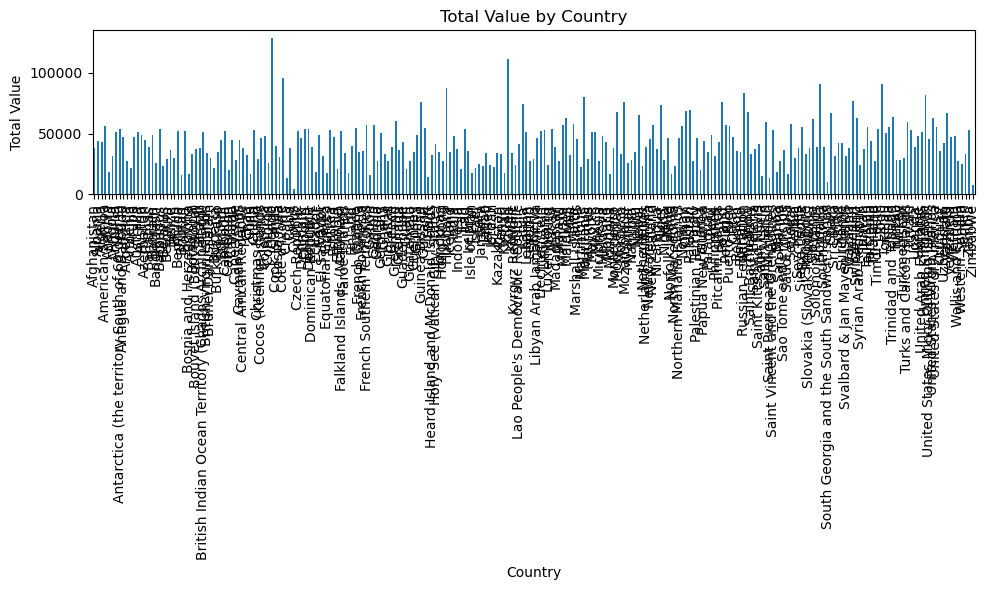

In [75]:
 #Create the bar plot
country_value.plot(kind='bar', figsize=(10, 6))
plt.title('Total Value by Country')
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# PIE CHART IMPORT V/S EXPORT

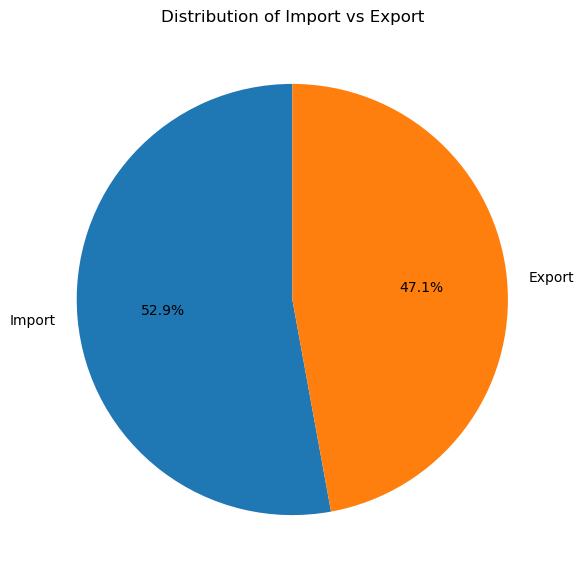

In [79]:
# Group by Import_Export and count the occurrences
import_export_count = df_sample['Import_Export'].value_counts()

# Create the pie chart
import_export_count.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), startangle=90)
plt.title('Distribution of Import vs Export')
plt.ylabel('')  # Removes the default y-label
plt.show()

In [ ]:
percentage of Export :47.1%
percentage of import :52.9%

In [ ]:
# SCATTER PLOT QUANTITY V/S VALUE

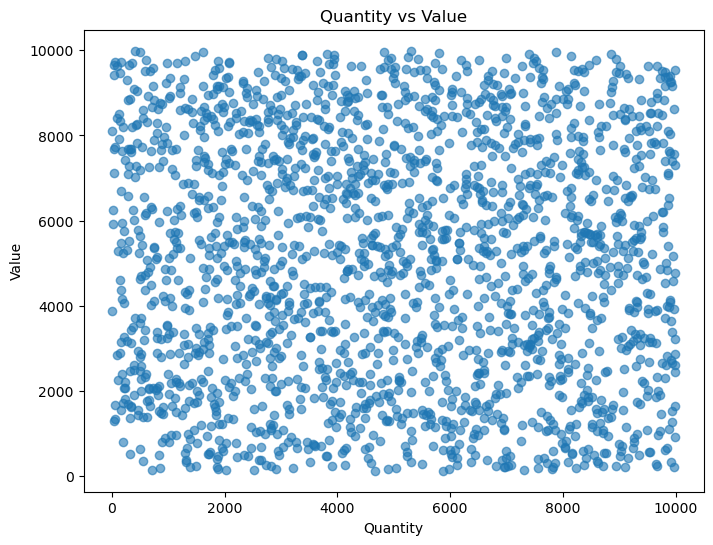

In [85]:
# Scatter plot of Quantity vs Value
plt.figure(figsize=(8, 6))
plt.scatter(df_sample['Quantity'], df_sample['Value'], alpha=0.6)
plt.title('Quantity vs Value')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()

**Observation/Finding **


In [ ]:
# Trade volume trends
The total volume of import and export is not stable as we can see that from 2019-20 the value of export has decreased.
# Top trading partners
The analysis identified greenland and Norfolk island are top trading partners.
# seasonal patterns
There are noticeable seasonal fluctuations in trade activities.

In [ ]:
# DESCRIPTIVE STATISTICS 

In [91]:
#1 Get a summary of the data
df_sample.describe()

,Quantity,Value,Date,Customs_Code,Weight,Invoice_Number
count,2001.000000,2001.000000,2001,2001.000000,2001.000000,2.001000e+03
mean,5002.228386,5075.406172,2022-03-14 09:45:04.047976192,552449.969015,2421.110710,5.048359e+07
min,1.000000,118.010000,2019-09-08 00:00:00,101600.000000,4.640000,4.795400e+04
25%,2575.000000,2627.470000,2021-01-07 00:00:00,337494.000000,1174.730000,2.597981e+07
50%,4930.000000,5186.550000,2022-03-30 00:00:00,540690.000000,2380.410000,5.129100e+07
75%,7486.000000,7570.270000,2023-05-26 00:00:00,774646.000000,3607.050000,7.506689e+07
max,9996.000000,9991.770000,2024-09-06 00:00:00,999563.000000,4997.240000,9.999723e+07
std,2870.216660,2830.067114,NaN,258290.582882,1447.671989,2.880986e+07


In [ ]:
# Mean of Value # Median of quantity # standard deviation of weight 

In [113]:
df_sample['Value'].mean()  # Mean of 'Value'
df_sample['Quantity'].median()  # Median of 'Quantity'
df_sample['Weight'].std()  # Standard deviation of 'Weight'

1447.6719892849685

In [115]:
#2 Handling Missing Values

In [117]:
# Check for missing values
df_sample.isnull().sum()
# Drop rows with missing values
df_sample_cleaned = df_sample.dropna()
# Fill missing values with the mean for numeric columns
df_sample_filled_mean = df_sample.fillna(df_sample.mean(numeric_only=True))
# Fill missing values with the median for numeric columns
data_filled_median = df_sample.fillna(df_sample.median(numeric_only=True))
# Fill missing values in non-numeric columns with 'Unknown'
df_sample['Category'] = df_sample['Category'].fillna('Unknown')

In [125]:
# Descriptive analysis for non-categorical data - Measures of Central Tendency

# Select non-categorical (numerical) columns
numerical_cols = df_sample.select_dtypes(include=['number'])
def cen_ten_mes(df_sample):
    measures = pd.DataFrame({
        'Minimum': df_sample.min(),
        'Maximum': df_sample.max(),
        'Mean': df_sample.mean().round(2),
        'Median': df_sample.median(),
        'Mode': df_sample.mode().iloc[0], # Mode may have multiple values, take the first one
        '25th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 25)),
        '50th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 50)),
        '75th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 75))
    })
    return measures

# Calculate and display the measures of central tendency for numerical columns
measures = cen_ten_mes(numerical_cols)
print(measures)

                  Minimum      Maximum         Mean       Median       Mode  \
Quantity             1.00      9996.00      5002.23      4930.00    4896.00   
Value              118.01      9991.77      5075.41      5186.55    1226.46   
Customs_Code    101600.00    999563.00    552449.97    540690.00  449634.00   
Weight               4.64      4997.24      2421.11      2380.41     387.36   
Invoice_Number   47954.00  99997226.00  50483591.00  51291001.00   47954.00   

                25th Percentile  50th Percentile  75th Percentile  
Quantity                2575.00          4930.00          7486.00  
Value                   2627.47          5186.55          7570.27  
Customs_Code          337494.00        540690.00        774646.00  
Weight                  1174.73          2380.41          3607.05  
Invoice_Number      25979813.00      51291001.00      75066888.00  


In [127]:
# Descriptive analysis for non-categorical data - Measures of Central Tendency

# Select non-categorical (numerical) columns
numerical_cols = df_sample.select_dtypes(include=['number'])
def cen_ten_mes(df_sample):
    measures = pd.DataFrame({
        'Minimum': df_sample.min(),
        'Maximum': df_sample.max(),
        'Mean': df_sample.mean().round(2),
        'Median': df_sample.median(),
        'Mode': df_sample.mode().iloc[0], # Mode may have multiple values, take the first one
        '25th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 25)),
        '50th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 50)),
        '75th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 75))
    })
    return measures

# Calculate and display the measures of central tendency for numerical columns
measures = cen_ten_mes(numerical_cols)
print(measures)

                  Minimum      Maximum         Mean       Median       Mode  \
Quantity             1.00      9996.00      5002.23      4930.00    4896.00   
Value              118.01      9991.77      5075.41      5186.55    1226.46   
Customs_Code    101600.00    999563.00    552449.97    540690.00  449634.00   
Weight               4.64      4997.24      2421.11      2380.41     387.36   
Invoice_Number   47954.00  99997226.00  50483591.00  51291001.00   47954.00   

                25th Percentile  50th Percentile  75th Percentile  
Quantity                2575.00          4930.00          7486.00  
Value                   2627.47          5186.55          7570.27  
Customs_Code          337494.00        540690.00        774646.00  
Weight                  1174.73          2380.41          3607.05  
Invoice_Number      25979813.00      51291001.00      75066888.00  


In [129]:
# Descriptive analysis for non-categorical data - Measures of Central Tendency

# Select non-categorical (numerical) columns
numerical_cols = df_sample.select_dtypes(include=['number'])
def cen_ten_mes(df_sample):
    measures = pd.DataFrame({
        'Minimum': df_sample.min(),
        'Maximum': df_sample.max(),
        'Mean': df_sample.mean().round(2),
        'Median': df_sample.median(),
        'Mode': df_sample.mode().iloc[0], # Mode may have multiple values, take the first one
        '25th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 25)),
        '50th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 50)),
        '75th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 75))
    })
    return measures

# Calculate and display the measures of central tendency for numerical columns
measures = cen_ten_mes(numerical_cols)
print(measures)

                  Minimum      Maximum         Mean       Median       Mode  \
Quantity             1.00      9996.00      5002.23      4930.00    4896.00   
Value              118.01      9991.77      5075.41      5186.55    1226.46   
Customs_Code    101600.00    999563.00    552449.97    540690.00  449634.00   
Weight               4.64      4997.24      2421.11      2380.41     387.36   
Invoice_Number   47954.00  99997226.00  50483591.00  51291001.00   47954.00   

                25th Percentile  50th Percentile  75th Percentile  
Quantity                2575.00          4930.00          7486.00  
Value                   2627.47          5186.55          7570.27  
Customs_Code          337494.00        540690.00        774646.00  
Weight                  1174.73          2380.41          3607.05  
Invoice_Number      25979813.00      51291001.00      75066888.00  


In [131]:
# Descriptive analysis for non-categorical data - Measures of Central Tendency

# Select non-categorical (numerical) columns
numerical_cols = df_sample.select_dtypes(include=['number'])
def cen_ten_mes(df_sample):
    measures = pd.DataFrame({
        'Minimum': df_sample.min(),
        'Maximum': df_sample.max(),
        'Mean': df_sample.mean().round(2),
        'Median': df_sample.median(),
        'Mode': df_sample.mode().iloc[0], # Mode may have multiple values, take the first one
        '25th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 25)),
        '50th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 50)),
        '75th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 75))
    })
    return measures

# Calculate and display the measures of central tendency for numerical columns
measures = cen_ten_mes(numerical_cols)
print(measures)

                  Minimum      Maximum         Mean       Median       Mode  \
Quantity             1.00      9996.00      5002.23      4930.00    4896.00   
Value              118.01      9991.77      5075.41      5186.55    1226.46   
Customs_Code    101600.00    999563.00    552449.97    540690.00  449634.00   
Weight               4.64      4997.24      2421.11      2380.41     387.36   
Invoice_Number   47954.00  99997226.00  50483591.00  51291001.00   47954.00   

                25th Percentile  50th Percentile  75th Percentile  
Quantity                2575.00          4930.00          7486.00  
Value                   2627.47          5186.55          7570.27  
Customs_Code          337494.00        540690.00        774646.00  
Weight                  1174.73          2380.41          3607.05  
Invoice_Number      25979813.00      51291001.00      75066888.00  


In [133]:
# Descriptive analysis for non-categorical data - Measures of Central Tendency

# Select non-categorical (numerical) columns
numerical_cols = df_sample.select_dtypes(include=['number'])
def cen_ten_mes(df_sample):
    measures = pd.DataFrame({
        'Minimum': df_sample.min(),
        'Maximum': df_sample.max(),
        'Mean': df_sample.mean().round(2),
        'Median': df_sample.median(),
        'Mode': df_sample.mode().iloc[0], # Mode may have multiple values, take the first one
        '25th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 25)),
        '50th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 50)),
        '75th Percentile': df_sample.apply(lambda x: np.percentile(x.dropna(), 75))
    })
    return measures

# Calculate and display the measures of central tendency for numerical columns
measures = cen_ten_mes(numerical_cols)
print(measures)

                  Minimum      Maximum         Mean       Median       Mode  \
Quantity             1.00      9996.00      5002.23      4930.00    4896.00   
Value              118.01      9991.77      5075.41      5186.55    1226.46   
Customs_Code    101600.00    999563.00    552449.97    540690.00  449634.00   
Weight               4.64      4997.24      2421.11      2380.41     387.36   
Invoice_Number   47954.00  99997226.00  50483591.00  51291001.00   47954.00   

                25th Percentile  50th Percentile  75th Percentile  
Quantity                2575.00          4930.00          7486.00  
Value                   2627.47          5186.55          7570.27  
Customs_Code          337494.00        540690.00        774646.00  
Weight                  1174.73          2380.41          3607.05  
Invoice_Number      25979813.00      51291001.00      75066888.00  


In [135]:
#Infrential Analysis - Test of Correlation {t}

#import relevant libraries
from scipy.stats import pearsonr
#Compute Pearson correlation between Quantity and Value
corr_quantity_value, pval_quantity_value = pearsonr(df_sample['Quantity'], df_sample['Value'])
print(f"Correlation between Quantity and Value: {round(corr_quantity_value,7)}, p-value: {round(pval_quantity_value,7)}")

# Compute Pearson correlation between Weight and Value
corr_weight_value, pval_weight_value = pearsonr(df['Weight'], df['Value'])
print(f"Correlation between Weight and Value: {round(corr_weight_value,7)}, p-value: {round(pval_weight_value,7)}")

Correlation between Quantity and Value: -0.0154013, p-value: 0.4911072
Correlation between Weight and Value: 0.0045272, p-value: 0.5792897


** Analysis made from t test **

In [ ]:

1. Correlation between Quantity and Value: -0.0154 (p-value: 0.4911)
Correlation Coefficient (-0.0154):

The value is very close to 0, indicating a negligible or no linear relationship between Quantity and Value.
A negative value suggests a very weak inverse relationship, meaning as Quantity increases, Value slightly decreases. However, since the value is so close to zero, this relationship is almost non-existent.
p-value (0.4911):

The p-value is greater than the commonly accepted threshold (e.g., 0.05), which means the correlation is not statistically significant.
This indicates that the observed correlation is likely due to random chance, and there is no meaningful linear relationship between Quantity and Value.
2. Correlation between Weight and Value: 0.0045 (p-value: 0.5793)
Correlation Coefficient (0.0045):

The correlation coefficient is very close to 0, suggesting virtually no linear relationship between Weight and Value.
A positive value suggests a very slight tendency for Value to increase as Weight increases, but again, this relationship is so weak that it's almost irrelevant.
p-value (0.5793):

Similar to the previous case, this p-value is greater than 0.05, indicating that the correlation is not statistically significant.
Therefore, there is no meaningful linear relationship between Weight and Value, and any small correlation is likely due to chance.
Overall Analysis:
Both correlations are very weak (near 0), indicating no meaningful linear relationships between Quantity and Value, or Weight and Value.
The p-values suggest that these correlations are not statistically significant, meaning the relationships are likely due to random variation and do not represent real patterns in the data.
In conclusion, Quantity and Weight do not have a significant impact on Value in this dataset based on these linear correlation results.

** Recommendation**

In [ ]:
1.Monitor regulatory changes
2.Carefully look upon your weights according to the output
3.we can add transaction value which is important for the analysis

** Conclusion**

In [ ]:
These findings highlight critical insights into import and export activities, providing a foundation for strategic decision making.The patterns observed can help inform stakeholders on potential opportunities and risks in the trading landscapes.